In [1]:
from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features = 2, n_informative = 1, n_redundant = 0, 
                           n_classes = 2, n_clusters_per_class = 1, random_state = 41, hypercube = False, 
                           class_sep = 20)

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

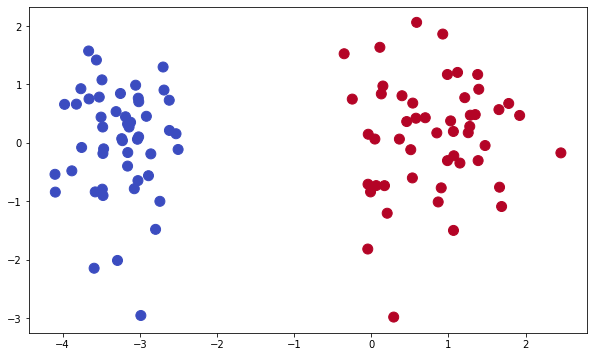

In [3]:
plt.figure(figsize = (10,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap = 'coolwarm', s = 100)

In [5]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(penalty = 'none', solver = 'sag')
lr.fit(X,y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(penalty='none', solver='sag')

In [25]:
print(lr.coef_, lr.intercept_)

[[4.78909529 0.21044327]] [5.75914583]


In [30]:
lr.coef_[0][0]

4.789095289570176

In [31]:
m1 = -((lr.coef_[0][0])/(lr.coef_[0][1]))
b1 = -(lr.intercept_/lr.coef_[0][1])
m1, b1

(-22.7571798207095, array([-27.36673825]))

In [32]:
x_input = np.linspace(-3,3,100)
y_input = m1*x_input + b1

In [7]:
#now code for lr manually

In [8]:
np.insert(X,0,1, axis = 1)

array([[ 1.        ,  0.51123145, -0.11697552],
       [ 1.        ,  0.06316371, -0.73115232],
       [ 1.        , -0.0425064 , -0.7081059 ],
       [ 1.        , -3.2891569 , -2.01199214],
       [ 1.        ,  0.1111445 ,  1.63493163],
       [ 1.        , -2.53070306,  0.15599044],
       [ 1.        , -3.49036198,  1.07782053],
       [ 1.        ,  0.3976447 ,  0.80626713],
       [ 1.        , -0.24666899,  0.74859527],
       [ 1.        , -3.65803446,  0.75152794],
       [ 1.        , -3.47658131, -0.90114581],
       [ 1.        , -3.47815037, -0.1815243 ],
       [ 1.        ,  0.29004249, -2.98092432],
       [ 1.        ,  1.11761831,  1.20500136],
       [ 1.        , -3.52530398,  0.78302407],
       [ 1.        ,  0.69929128,  0.42968688],
       [ 1.        ,  0.17089733, -0.73229726],
       [ 1.        , -3.57785124, -0.83930476],
       [ 1.        ,  0.12965489,  0.83727062],
       [ 1.        , -3.46888717, -0.10255323],
       [ 1.        , -3.97487212,  0.658

In [12]:
def gd(X,y,lr, epoch):
    
    X = np.insert(X,0,1,axis = 1)
    # initializing the weights to 1
    weights = np.ones(X.shape[1])
    for i in range(epoch):
        y_hat = sigmoid(np.dot(X, weights))
        weights = weights + lr*(np.dot((y-y_hat),X)/X.shape[0])
    return weights[1:], weights[0]

In [13]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
    

In [35]:
coef_, intercept_ = gd(X,y,0.5,5000)

In [36]:
coef_

array([4.83926872, 0.21182255])

In [37]:
intercept_

5.833388649053249

In [38]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])
m, b

(-22.84586207917221, -27.53903541191917)

In [39]:
x_input1 = np.linspace(-2,3,100)
y_input1 = m*x_input1 +b

(-3, 2)

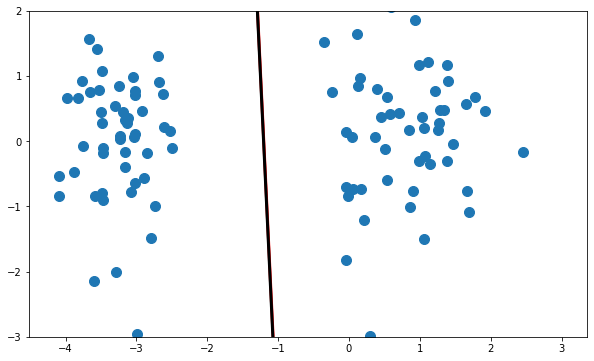

In [40]:
plt.figure(figsize = (10,6))
plt.plot(x_input, y_input, color = 'red', linewidth = 3)
plt.plot(x_input1, y_input1, color = 'black', linewidth = 3)
plt.scatter(X[:,0], X[:,1],cmap = 'coolwarm', s = 100)
plt.ylim(-3,2)